In [11]:
import os
import sys

sys.path.append('../..')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from scipy.io import wavfile
from pylab import*
import IPython

from pymir import *
# from pymir import *

In [12]:
orig_df = pd.read_hdf("../../data_extract/features_dataset_2b.h5")
from pymir import *

In [13]:
mfcc_list = ["mfcc{}".format(i) for i in range(14)]
chroma_list = ["chroma{}".format(i) for i in range(12)]

In [14]:
from numpy import corrcoef, sum, log, arange
from numpy.random import rand
from pylab import pcolor, show, colorbar, xticks, yticks

In [15]:
def get_file_path(df, p_id, f_num):
    df_pi = df[df['id']==p_id]
    fname = df_pi.sort_values('fname').fname.unique()[f_num]
    chname = df_pi[df_pi['fname']==fname]['chname'].iloc[0]
    pid = df_pi[df_pi['fname']==fname]['pid'].iloc[0]
    return "../../data/dev-clean/"+pid+"/"+chname+"/"+fname

def get_person_info(df, pid):
    row = orig_df[orig_df['id']==pid].iloc[1]
    info = str(row['pname']) + "(" + str(row['pgender']) + ")"
    return info

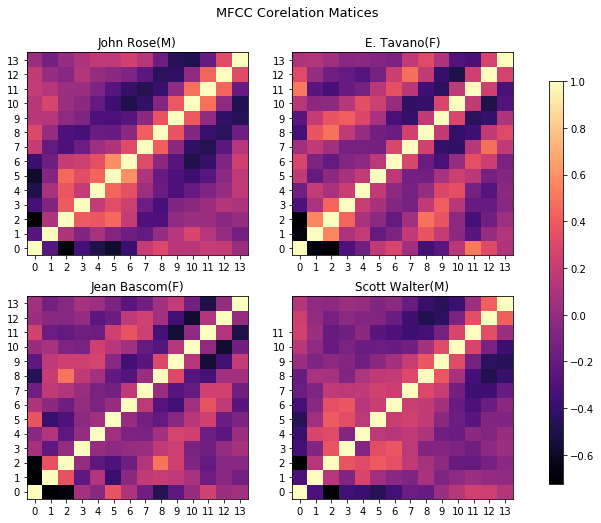

In [27]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(10,8))

plt.setp(axes, xticks=arange(0.5,14.5), xticklabels=range(0,14),
        yticks=arange(0.5,14.5), yticklabels=range(0,14))

plt.yticks(arange(0.5,12.5),range(0,12))

for i,pid in enumerate([0,1,32,33]):
    R = corrcoef(orig_df[orig_df['id']==pid][mfcc_list],rowvar = 0)
    axobj = axes.flat[i]
    plot1 = axobj.pcolormesh(R,cmap='magma');
    _ = axobj.set_title(get_person_info(orig_df,pid));

fig.subplots_adjust(hspace=0.2);
fig.subplots_adjust(right=0.8);
fig.suptitle("MFCC Corelation Matices",fontsize = 13)

fig.subplots_adjust(top=0.90)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7]);
fig.colorbar(plot1, cax=cbar_ax);

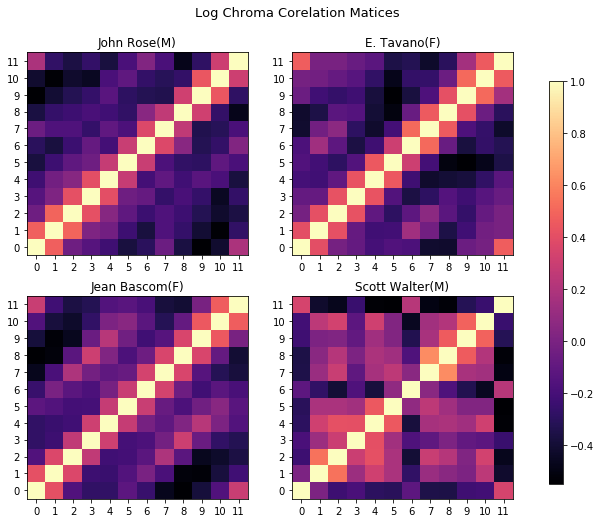

In [26]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(10,8))

plt.setp(axes, xticks=arange(0.5,12.5), xticklabels=range(0,12),
        yticks=arange(0.5,12.5), yticklabels=range(0,12))

for i,pid in enumerate([0,1,32,33]):
    R = corrcoef(np.log(orig_df[orig_df['id']==pid][chroma_list]),rowvar = 0)
    axobj = axes.flat[i]
    plot1 = axobj.pcolormesh(R,cmap='magma');
    _ = axobj.set_title(get_person_info(orig_df,pid));

fig.subplots_adjust(hspace=0.2);
fig.subplots_adjust(right=0.8);
fig.suptitle("Log Chroma Corelation Matices",fontsize = 13)

fig.subplots_adjust(top=0.90)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7]);
fig.colorbar(plot1, cax=cbar_ax);

In [19]:
# We'll need numpy for some mathematical operations
import numpy as np


# matplotlib for displaying the output
import matplotlib.pyplot as plt
import matplotlib.style as ms
ms.use('seaborn-muted')
%matplotlib inline


# and IPython.display for audio output
import IPython.display


# Librosa for audio
import librosa
# And the display module for visualization
import librosa.display

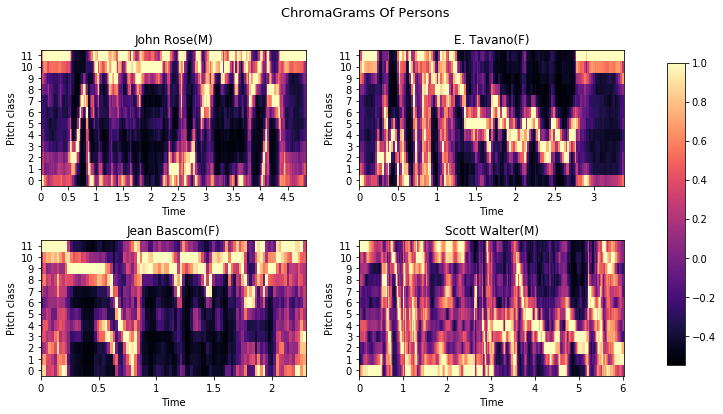

In [24]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(12,6))

for i,(pid,f_num) in enumerate([(0,1),(1,15),(32,15),(33,0)]):
    y, sr = librosa.load(get_file_path(orig_df, pid, f_num))
    plt.subplot(2, 2, i+1)
    y_harmonic, y_percussive = librosa.effects.hpss(y)
    C = librosa.feature.chroma_cqt(y=y_harmonic, sr=sr)
    librosa.display.specshow(C, sr=sr, x_axis='time', y_axis='chroma', cmap='magma', vmin=0, vmax=1);
    plt.title(get_person_info(orig_df,pid))
    plt.yticks(arange(0.5,12.5),range(0,12))

fig.subplots_adjust(hspace=0.4);
fig.subplots_adjust(right=0.8);
fig.suptitle("ChromaGrams Of Persons",fontsize = 13)

fig.subplots_adjust(top=0.88)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7]);
fig.colorbar(plot1, cax=cbar_ax);

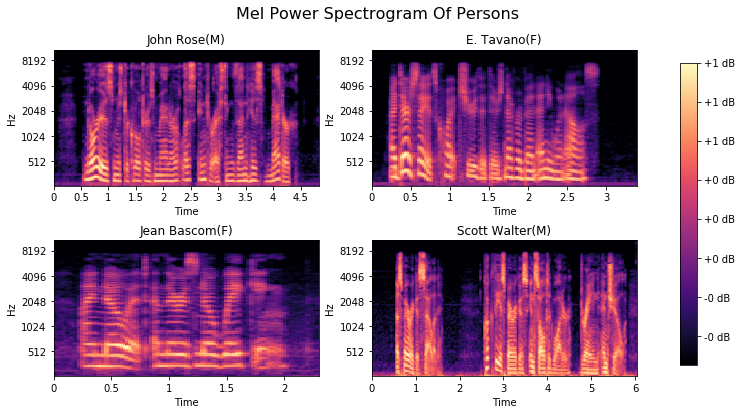

In [25]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(12,6))

for i,(pid,f_num) in enumerate([(0,1),(1,15),(32,15),(33,0)]):
    y, sr = librosa.load(get_file_path(orig_df, pid, f_num))
    plt.subplot(2, 2, i+1)
    S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
    log_S = librosa.logamplitude(S, ref_power=np.max)
    librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel', cmap='magma');
    plt.title(get_person_info(orig_df,pid))

fig.subplots_adjust(hspace=0.4);
fig.subplots_adjust(right=0.8);
fig.suptitle("Mel Power Spectrogram Of Persons",fontsize = 16)

fig.subplots_adjust(top=0.88)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7]);
fig.colorbar(plot1, cax=cbar_ax, format='%+02.0f dB');